In [1]:
import os
import glob
import pandas as pd
import seaborn as sns 

sns.set_theme(style="ticks")

In [2]:
class Reader:
    def __init__(self,dir) -> None:
        self.root_dir = dir
        
    def load_dbs(self, dbs_names):
        return {name : pd.read_csv(os.path.join(self.root_dir,name,"df.csv"),delimiter=",") for name in dbs_names}
    
    def report(self):
        print(os.listdir(self.root_dir))

In [7]:
DATA_DIR = "/Users/jorgeaugustomartinezortiz/Repos/paper/dev_metropolis/data"
root = os.path.join(DATA_DIR,'databases')
names_dbs = ['social',
             'facebook',
             'citation',
             'infrastructure',
             'interaction',
             'social']

# Read data frames
reader = Reader(root)
dbs = reader.load_dbs(names_dbs)
df = pd.concat(dbs,names=['Type','Row'])
df.reset_index(inplace=True)
df.drop(columns=['Row'],inplace=True)
df

,Type,Graph Name,num_vertices,num_edges,degree_max,degree_avg,assortativity_coeff,num_triangles,avg_num_triangles,max_triangles_per_edge,clustering_local_avg,clustering_global,max_k_core,low_max_clique,size
0,social,soc-pages-artist,51000.0,819000.0,1000.0,32.0,-0.02,7000000.0,135.0,27000.0,0.14,0.05,70.0,9.0,4000000.0
1,social,soc-pages-company,14000.0,52000.0,215.0,7.0,0.01,168000.0,11.0,806.0,0.24,0.15,21.0,12.0,472000.0
2,social,soc-pages-food,620.0,2000.0,132.0,6.0,-0.03,9000.0,14.0,461.0,0.33,0.22,12.0,10.0,19000.0
3,social,soc-pages-government,7000.0,89000.0,697.0,25.0,0.03,2000000.0,222.0,13000.0,0.41,0.22,47.0,14.0,467000.0
4,social,soc-pages-media,28000.0,206000.0,678.0,14.0,0.02,1000000.0,41.0,2000.0,0.30,0.11,32.0,14.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,interaction,ia-wiki-Talk,92000.0,361000.0,1000.0,7.0,-0.03,3000000.0,27.0,18000.0,0.06,0.05,59.0,10.0,1000000.0
228,interaction,ia-wiki-trust-dir,139000.0,740000.0,12000.0,10.0,-0.05,11000000.0,82.0,197000.0,0.29,0.04,65.0,23.0,2000000.0
229,interaction,ia-wiki-user-edits-page,2000000.0,9000000.0,1000000.0,8.0,1.00,NaN,501.0,114000000.0,1.40,0.00,18000.0,17.0,53000000.0
230,interaction,ia-wikiquote-user-edits,93000.0,549000.0,50000.0,11.0,0.95,65000000.0,700.0,7000000.0,0.55,0.02,2000.0,20.0,3000000.0


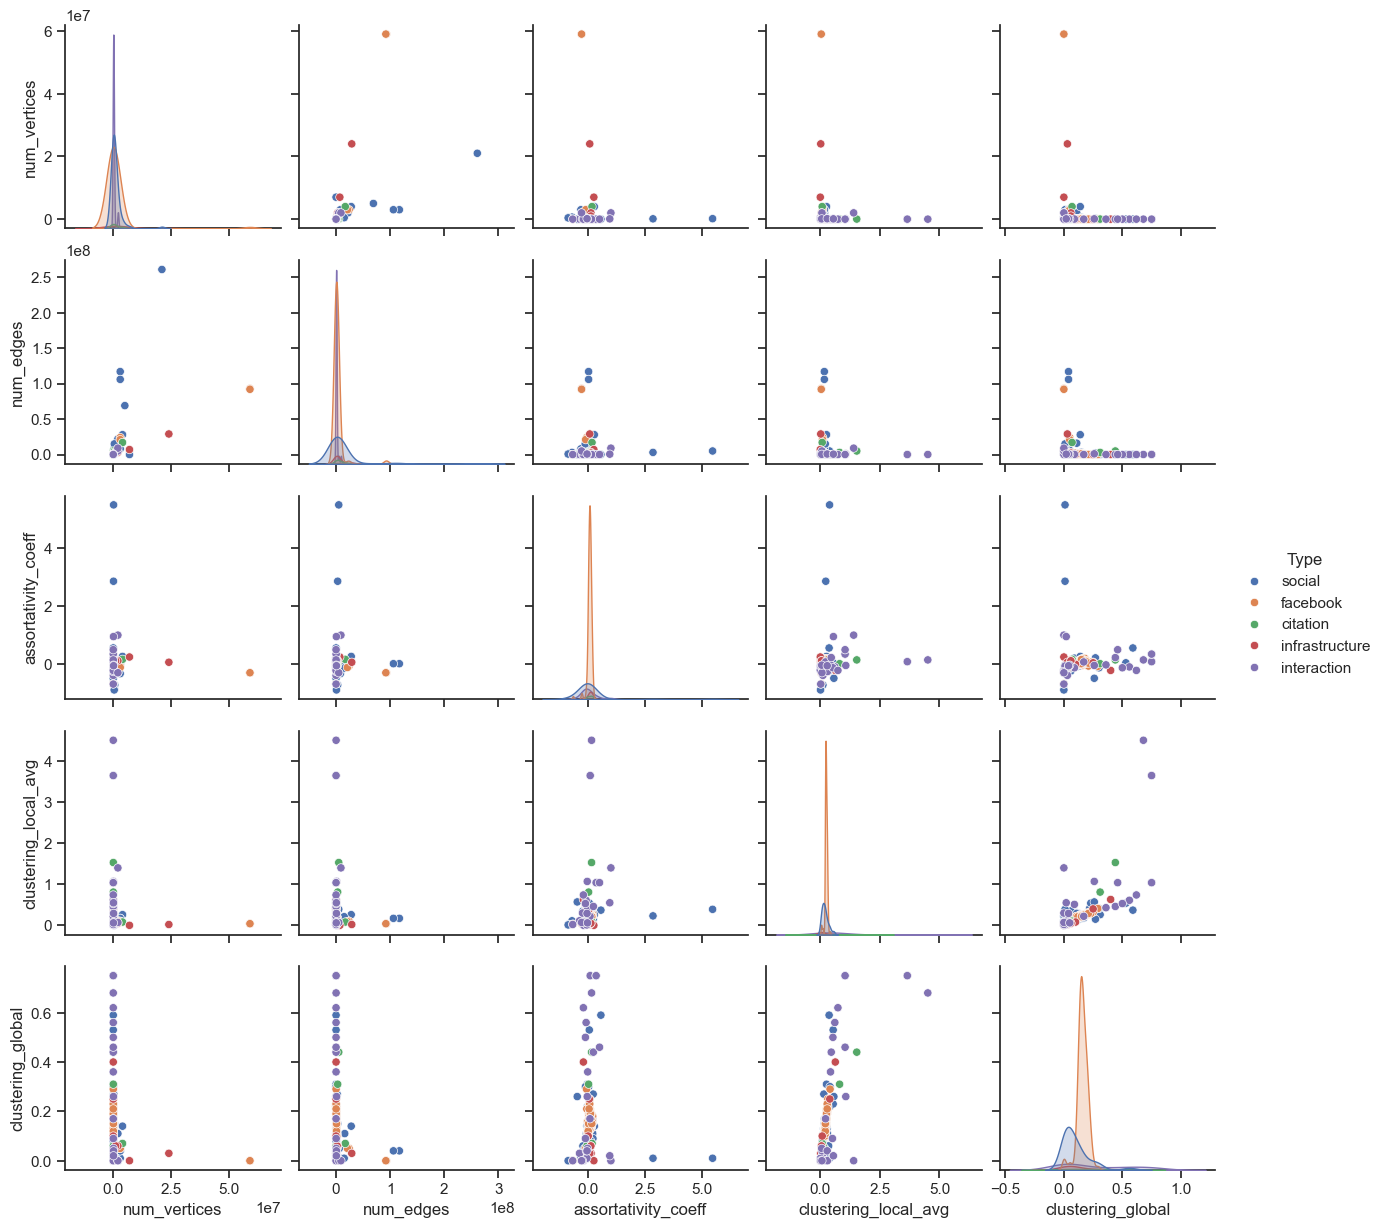

In [8]:
sns.pairplot(df,hue="Type",vars=['num_vertices','num_edges','assortativity_coeff','clustering_local_avg','clustering_global'])

In [ ]:
sns.pairplot(df,hue="Type")